In [1]:
import os
os.chdir('/vco260/')

In [2]:
from src.gene_collaborative_filtering import *

Using TensorFlow backend.


In [3]:
codes=load_from_pickle('data/codes.codes')

In [4]:
train_data=pd.read_parquet('data/train_data.parquet')
test_data=pd.read_parquet('data/test_data.parquet')
train_data=train_data[['Entry_categorical','go_categorical','target']]
test_data=test_data[['Entry_categorical','go_categorical','target']]
train_data

Entry_categorical  go_categorical  target
0                  191329            5431    0.01
1                  191796            6490    0.01
2                  191877            2216    0.01
3                  189998            3924    0.01
4                  190491            2666    0.01
7                  191676            3609    0.01
9                  192119            3464    0.01
11                 191934             706    0.01
13                 190743            2365    0.01
16                 191213            3669    0.01
18                 192348            4938    0.01
19                 190088            2102    0.01
20                 190127            2971    0.01
22                 192104            1670    0.01
24                 191520             887    0.01
25                 191192            1085    0.01
26                 191813            4638    0.01
27                 192157            1803    0.01
28                 191195            6444    0.01
29                 191092            6933    0.01
30                 192347            4798    0.01
33                 192365            4873    0.01
34                 191700            4366    0.01
36                 191840            2912    0.01
40                 190236            3443    0.01
42                 190870            1453    0.01
43                 191139             850    0.01
44                 190393             251    0.01
45                 191270            2302    0.01
47                 191967             676    0.01
...                   ...             ...     ...
800459             245869            6120    0.99
800460              68966            7542    0.99
800461              72825            7542    0.99
800462             153361            6120    0.99
800463             184824            1892    0.99
800464             216408            7542    0.99
800466             245869            7542    0.99
800467              68966             427    0.99
800468              72825             427    0.99
800469             153361            7542    0.99
800470             184824            1813    0.99
800471             216408             427    0.99
800473             245869             427    0.99
800474              68966            6195    0.99
800475              72825            6195    0.99
800476             153361             427    0.99
800477             184824            6819    0.99
800478             216408            6195    0.99
800480             245869            6195    0.99
800481              68966            7526    0.99
800482              72825            7526    0.99
800483             153361            6195    0.99
800485             216408            7526    0.99
800487             245869            7526    0.99
800488             153361            7526    0.99
800489             184824            2801    0.99
800490             184824            3408    0.99
800491             184824            1673    0.99
800492             184824            4472    0.99
800493             184824            5054    0.99

[1056196 rows x 3 columns]

In [5]:
model,clr=train_colab3(train_data,test_data,epochs=5,batch_size=10000,minimum_lr=0.001,maximum_lr=0.05)

5
Epoch 1/5
105/105 [==============================] - 11s 101ms/step - loss: 0.7605 - acc: 0.0000e+00 - val_loss: 0.6876 - val_acc: 0.0000e+00
Epoch 2/5
105/105 [==============================] - 10s 95ms/step - loss: 0.4420 - acc: 0.0000e+00 - val_loss: 0.4149 - val_acc: 0.0000e+00
Epoch 3/5
105/105 [==============================] - 10s 95ms/step - loss: 0.3846 - acc: 0.0000e+00 - val_loss: 0.3879 - val_acc: 0.0000e+00
Epoch 4/5
105/105 [==============================] - 10s 95ms/step - loss: 0.3422 - acc: 0.0000e+00 - val_loss: 0.3896 - val_acc: 0.0000e+00
Epoch 5/5
105/105 [==============================] - 10s 95ms/step - loss: 0.2964 - acc: 0.0000e+00 - val_loss: 0.3912 - val_acc: 0.0000e+00


In [21]:
from sklearn.metrics import accuracy_score
test_1=test_data[test_data['target']==0.01][['Entry_categorical','go_categorical']]
test_1['target']=0
test_2=test_data[test_data['target']==0.99][['Entry_categorical','go_categorical']]
test_2['target']=1
test_data_accu=pd.concat([test_2,test_1])

In [22]:
#predict on test data to find best and worst go terms
test_data_accu['pred']=model.predict(get_val_data2(test_data_accu)[0])

In [26]:
accuracy_score((test_data_accu['pred']>0.5).astype(int),test_data_accu['target'])

0.84955

In [30]:
test_data_accu['sing_accu']=1-np.abs((test_data_accu['pred']>0.5).astype(int)-test_data_accu['target'])

In [49]:
tempdf=pd.DataFrame()
tempdf['accuracy']=test_data_accu.groupby('go_categorical').mean()['sing_accu']

In [50]:
# # get original go terms from codes
# tempdf['go_term']=tempdf.apply(lambda x: codes[1][int(x.go_categorical)] )
tempdf['go_term']=[codes[1][int(x)] for x in tempdf.index]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57e4227dd8>]],
      dtype=object)

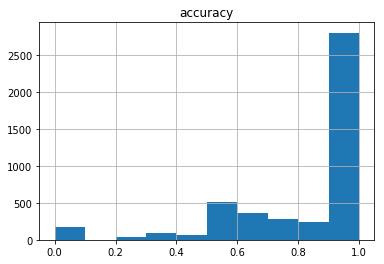

In [55]:
tempdf.hist('accuracy')